In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install delayed

In [ ]:
!pip install scikit-multilearn

     |████████████████████████████████| 89 kB 7.2 MB/s 


In [ ]:
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
import csv
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import re
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
rcParams['figure.figsize'] = 12,8

In [ ]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip

--2021-07-31 07:26:24--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/dataset52a7b21.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.32.25
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.32.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1061576029 (1012M) [binary/octet-stream]
Saving to: ‘dataset52a7b21.zip’

dataset52a7b21.zip  100%[===================>]   1012M  12.6MB/s    in 84s     

2021-07-31 07:27:49 (12.0 MB/s) - ‘dataset52a7b21.zip’ saved [1061576029/1061576029]



In [ ]:
!unzip dataset52a7b21.zip

Archive:  dataset52a7b21.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        
  inflating: dataset/.~lock.train.csv#  


In [ ]:
train_df=pd.read_csv('dataset/train.csv',escapechar="\\",quoting=csv.QUOTE_NONE)
test_df=pd.read_csv('dataset/test.csv',escapechar="\\",quoting=csv.QUOTE_NONE)

In [ ]:
train_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,NaN,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),NaN,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,NaN,NaN,NaN,4


In [ ]:
train_df.isna().sum()

TITLE                 71
DESCRIPTION       723664
BULLET_POINTS     166263
BRAND              56737
BROWSE_NODE_ID         0
dtype: int64

In [ ]:
train_df['TITLE']=train_df['TITLE'].fillna("")
train_df['DESCRIPTION']=train_df['DESCRIPTION'].fillna("")
train_df['BULLET_POINTS']=train_df['BULLET_POINTS'].fillna("")
test_df['TITLE']=test_df['TITLE'].fillna("")
test_df['DESCRIPTION']=test_df['DESCRIPTION'].fillna("")
test_df['BULLET_POINTS']=test_df['BULLET_POINTS'].fillna("")

In [ ]:
train_df["BRAND"].value_counts()

Generic                                                  107303
Puma                                                      14131
United Colors of Benetton                                 11821
Max                                                       11180
US Polo Association                                        8570
                                                          ...  
Dynamic Athletica                                             1
Juventus F.C.                                                 1
Shaptha Swarangal Musical Instruments Sales & Service         1
Whole.Fit Omay Snacks                                         1
Hecaty                                                        1
Name: BRAND, Length: 258265, dtype: int64

In [ ]:
train_df['BRAND']=train_df['BRAND'].fillna('Generic')
test_df['BRAND']=test_df['BRAND'].fillna('Generic')

In [ ]:
train_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3
4,Teacher Planner Company A4 6 Lesson Academic T...,,,Generic,4


In [ ]:
train_df.tail()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID
2903019,Premium Aviator Sunglasses - HD Polarized (Bri...,These premium Aviator Sunglasses with 5 color ...,"[Frame size: Lens height - 56mm, Lens width - ...",Generic,1040
2903020,Social Distance Stickers - Set of 5 Sticker Sl...,set of 5 prints social distancing sticker self...,[covid19 safety sticker - set of 5 to maintain...,Generic,15199
2903021,Torr-to Face Shield PACK OF 5 with Adjustable ...,* COMPLETE FACE PROTECTION: Torr-to Face Shiel...,"[350 MICRONS PACK OF 5 PCS,COMPLETE FACE PROTE...",TORR-TO,1044933
2903022,Type-C to 3.5 MM for Oppo R17 Pro Type-C to 3....,Still want to use your favorite earphones/head...,"[Indian Connectors: Made for Indian sockets, t...",SHOPBELL,14790
2903023,KNG Orange Polo Tshirt (38),Performance inspired by comfort. The polo shir...,,KNG,1213


In [ ]:
train_df.isna().sum()

TITLE             0
DESCRIPTION       0
BULLET_POINTS     0
BRAND             0
BROWSE_NODE_ID    0
dtype: int64

In [ ]:
test_df.isna().sum()

PRODUCT_ID       0
TITLE            0
DESCRIPTION      0
BULLET_POINTS    0
BRAND            0
dtype: int64

In [ ]:
train_df.describe()

,BROWSE_NODE_ID
count,2.903024e+06
mean,9.211321e+03
std,5.606280e+04
min,0.000000e+00
25%,7.000000e+02
50%,1.072000e+03
75%,2.546000e+03
max,2.893574e+06


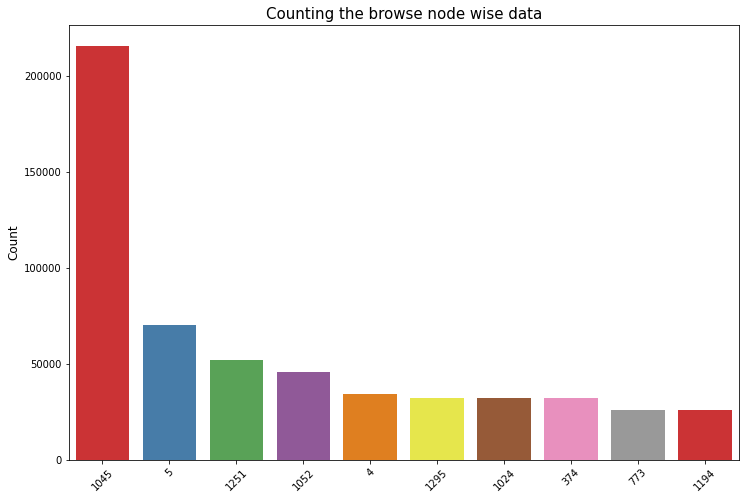

In [ ]:
g = sns.countplot('BROWSE_NODE_ID', data=train_df, palette="Set1",order = train_df['BROWSE_NODE_ID'].value_counts().head(10).index)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the browse node wise data", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

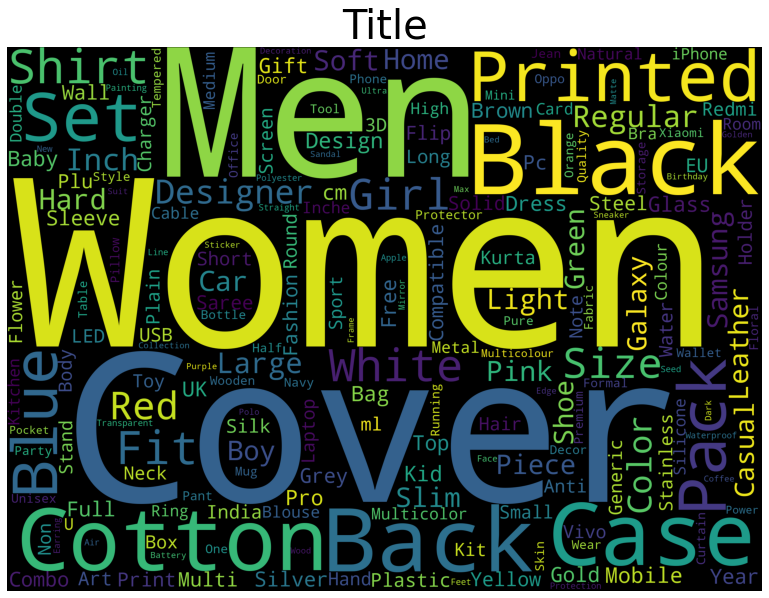

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20,10))
# clean
text = train_df.TITLE.values
cloud_brand = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Title",fontsize=40)
plt.imshow(cloud_brand)

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20,10))
# clean
text = train_df.DESCRIPTION.values
cloud_brand = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Description",fontsize=40)
plt.imshow(cloud_brand)

In [ ]:
train_df=train_df[:10000]

In [ ]:
train_df['INFO'] = train_df['DESCRIPTION'] + ' ' + train_df['TITLE']
test_df['INFO'] = test_df['DESCRIPTION'] + ' ' + test_df['TITLE']

In [ ]:
train_df.head()

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,INFO
0,"Pete The Cat Bedtime Blues Doll, 14.5 Inch","Pete the Cat is the coolest, most popular cat ...","[Pete the Cat Bedtime Blues plush doll,Based o...",MerryMakers,0,"Pete the Cat is the coolest, most popular cat ..."
1,"The New Yorker NYHM014 Refrigerator Magnet, 2 ...",The New Yorker Handsome Cello Wrapped Hard Mag...,[Cat In A Tea Cup by New Yorker cover artist G...,The New Yorker,1,The New Yorker Handsome Cello Wrapped Hard Mag...
2,The Ultimate Self-Sufficiency Handbook: A Comp...,,Skyhorse Publishing,imusti,2,The Ultimate Self-Sufficiency Handbook: A Com...
3,Amway Nutrilite Kids Chewable Iron Tablets (100),,"[Nutrilite Kids,Chewable Iron Tablets,Quantity...",Amway,3,Amway Nutrilite Kids Chewable Iron Tablets (100)
4,Teacher Planner Company A4 6 Lesson Academic T...,,,Generic,4,Teacher Planner Company A4 6 Lesson Academic ...


In [ ]:
"""labelencoder = LabelEncoder()
train_df['BRAND'] = labelencoder.fit_transform(train_df['BRAND'].astype(str))
train_df"""

"labelencoder = LabelEncoder()\ntrain_df['BRAND'] = labelencoder.fit_transform(train_df['BRAND'].astype(str))\ntrain_df"

In [ ]:
# function to clean data
import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

stop_words = set(stopwords.words('english'))

def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    txt = str(text)
    
    # Replace apostrophes with standard lexicons
    txt = txt.replace("isn't", "is not")
    txt = txt.replace("aren't", "are not")
    txt = txt.replace("ain't", "am not")
    txt = txt.replace("won't", "will not")
    txt = txt.replace("didn't", "did not")
    txt = txt.replace("shan't", "shall not")
    txt = txt.replace("haven't", "have not")
    txt = txt.replace("hadn't", "had not")
    txt = txt.replace("hasn't", "has not")
    txt = txt.replace("don't", "do not")
    txt = txt.replace("wasn't", "was not")
    txt = txt.replace("weren't", "were not")
    txt = txt.replace("doesn't", "does not")
    txt = txt.replace("'s", " is")
    txt = txt.replace("'re", " are")
    txt = txt.replace("'m", " am")
    txt = txt.replace("'d", " would")
    txt = txt.replace("'ll", " will")
    txt = txt.replace("--th", " ")
    
    # More cleaning
    txt = re.sub(r"alot", "a lot", txt)
    txt = re.sub(r"what's", "", txt)
    txt = re.sub(r"What's", "", txt)
    
    
    # Remove urls and emails
    txt = re.sub(r'^https?:\/\/.*[\r\n]*', ' ', txt, flags=re.MULTILINE)
    txt = re.sub(r'[\w\.-]+@[\w\.-]+', ' ', txt, flags=re.MULTILINE)
    
    # Replace words like sooooooo with so
    txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
    
    # Remove punctuation from text
    txt = ''.join([c for c in text if c not in punctuation])
    
    # Remove all symbols
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    txt = re.sub(r'\n',r' ',txt)
    
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stop_words])
        
    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
    
    if lemmatization:
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt

In [ ]:
# clean info
train_df['INFO'] = train_df['INFO'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=False, lemmatization = False))
test_df['INFO'] = test_df['INFO'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True, stemming=False, lemmatization = False))

In [ ]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(1237)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(train_df.drop(['BROWSE_NODE_ID','TITLE','DESCRIPTION','BULLET_POINTS'], axis=1), train_df['BROWSE_NODE_ID'], random_state=42,test_size=0.2)

In [ ]:
#len(x_train),len(x_test)

In [ ]:
# 20 news groups
num_labels = 2118
vocab_size = 15000
batch_size = 100
num_epochs = 30

# lets take 80% data as training and remaining 20% for test.
train_size = int(len(train_df) * .8)

train_brand = train_df['INFO'][:train_size]
train_node = train_df['BROWSE_NODE_ID'][:train_size]

test_brand = train_df['INFO'][train_size:]
test_node = train_df['BROWSE_NODE_ID'][train_size:]

# define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train_brand)

x_train = tokenizer.texts_to_matrix(train_brand, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_brand, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_node)
y_train = encoder.transform(train_node)
y_test = encoder.transform(test_node)

In [ ]:
len(x_train),len(x_test)

(8000, 2000)

In [ ]:
x_train.shape,y_train.shape

((8000, 15000), (8000, 2118))

In [ ]:
#let us build a basic model
model = Sequential()
model.add(Dense(3600, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(3600))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3600)              54003600  
_________________________________________________________________
activation (Activation)      (None, 3600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3600)              12963600  
_________________________________________________________________
activation_1 (Activation)    (None, 3600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2118)              7

In [ ]:
num_epochs =10
batch_size = 128
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)

Epoch 1/10
50/50 - 3s - loss: 6.3523 - accuracy: 0.1645 - val_loss: 4.7473 - val_accuracy: 0.3719
Epoch 2/10
50/50 - 1s - loss: 3.6032 - accuracy: 0.4741 - val_loss: 4.2367 - val_accuracy: 0.4512
Epoch 3/10
50/50 - 1s - loss: 1.5855 - accuracy: 0.7589 - val_loss: 4.4082 - val_accuracy: 0.4712
Epoch 4/10
50/50 - 1s - loss: 0.5391 - accuracy: 0.9339 - val_loss: 4.6979 - val_accuracy: 0.4569
Epoch 5/10
50/50 - 1s - loss: 0.2254 - accuracy: 0.9786 - val_loss: 4.6973 - val_accuracy: 0.4600
Epoch 6/10
50/50 - 1s - loss: 0.1488 - accuracy: 0.9831 - val_loss: 4.5765 - val_accuracy: 0.4894
Epoch 7/10
50/50 - 1s - loss: 0.1113 - accuracy: 0.9873 - val_loss: 4.5325 - val_accuracy: 0.4769
Epoch 8/10
50/50 - 1s - loss: 0.0581 - accuracy: 0.9903 - val_loss: 4.6484 - val_accuracy: 0.4913
Epoch 9/10
50/50 - 1s - loss: 0.0587 - accuracy: 0.9925 - val_loss: 4.7095 - val_accuracy: 0.4744
Epoch 10/10
50/50 - 1s - loss: 0.0571 - accuracy: 0.9939 - val_loss: 4.7073 - val_accuracy: 0.4944


In [ ]:
score, acc = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

16/16 - 0s - loss: 2.7383 - accuracy: 0.5065
Test accuracy: 0.5065000057220459


In [ ]:
from imblearn.over_sampling import RandomOverSampler 
ros = RandomOverSampler(sampling_strategy='minority')

X_sm, y_sm = ros.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

(8346, 15000) (8346, 2118)


In [ ]:
y_train_labels = np.argmax(y_train, axis =1)
y_train_labels

array([  0,   1,   2, ..., 956, 903, 177])

In [ ]:
y_test_labels = np.argmax(y_test, axis =1)
y_test_labels

array([ 751,   38,  649, ...,  677, 1237,   38])

In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
class_weight = {l:c for l,c in zip(np.unique(y_train_labels), class_weight)}
num_epochs =10
batch_size = 128
history = model.fit(X_sm, y_sm,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    class_weight=class_weight,
                    validation_split=0.2)

Epoch 1/10
53/53 - 1s - loss: 0.4018 - accuracy: 0.9655 - val_loss: 3.1347 - val_accuracy: 0.5731
Epoch 2/10
53/53 - 1s - loss: 0.2772 - accuracy: 0.9784 - val_loss: 4.2061 - val_accuracy: 0.5617
Epoch 3/10
53/53 - 1s - loss: 0.4821 - accuracy: 0.9813 - val_loss: 3.6157 - val_accuracy: 0.5820
Epoch 4/10
53/53 - 1s - loss: 0.1561 - accuracy: 0.9838 - val_loss: 4.0537 - val_accuracy: 0.5659
Epoch 5/10
53/53 - 1s - loss: 0.1139 - accuracy: 0.9855 - val_loss: 4.2903 - val_accuracy: 0.5802
Epoch 6/10
53/53 - 1s - loss: 0.1742 - accuracy: 0.9880 - val_loss: 4.0193 - val_accuracy: 0.5892
Epoch 7/10
53/53 - 1s - loss: 0.1639 - accuracy: 0.9925 - val_loss: 3.9165 - val_accuracy: 0.5856
Epoch 8/10
53/53 - 1s - loss: 0.0512 - accuracy: 0.9909 - val_loss: 3.9171 - val_accuracy: 0.5802
Epoch 9/10
53/53 - 1s - loss: 0.1480 - accuracy: 0.9915 - val_loss: 3.9596 - val_accuracy: 0.5802
Epoch 10/10
53/53 - 1s - loss: 0.0537 - accuracy: 0.9898 - val_loss: 4.0894 - val_accuracy: 0.5671


In [ ]:
from imblearn.under_sampling import RandomUnderSampler 
ros = RandomUnderSampler(sampling_strategy='majority')

X_sm, y_sm = ros.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

(7654, 15000) (7654, 2118)


In [ ]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(y_train_labels) ,y_train_labels)
class_weight = {l:c for l,c in zip(np.unique(y_train_labels), class_weight)}
num_epochs =10
batch_size = 128
history = model.fit(X_sm, y_sm,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    class_weight=class_weight,
                    validation_split=0.2)

Epoch 1/10
48/48 - 1s - loss: 0.2709 - accuracy: 0.9231 - val_loss: 2.6822 - val_accuracy: 0.7903
Epoch 2/10
48/48 - 1s - loss: 0.0565 - accuracy: 0.9809 - val_loss: 2.7963 - val_accuracy: 0.7831
Epoch 3/10
48/48 - 1s - loss: 0.0464 - accuracy: 0.9866 - val_loss: 2.7814 - val_accuracy: 0.7858
Epoch 4/10
48/48 - 1s - loss: 0.0264 - accuracy: 0.9913 - val_loss: 2.7391 - val_accuracy: 0.7858
Epoch 5/10
48/48 - 1s - loss: 0.0295 - accuracy: 0.9922 - val_loss: 2.8262 - val_accuracy: 0.7864
Epoch 6/10
48/48 - 1s - loss: 0.0970 - accuracy: 0.9946 - val_loss: 2.8592 - val_accuracy: 0.7864
Epoch 7/10
48/48 - 1s - loss: 0.0113 - accuracy: 0.9930 - val_loss: 2.9036 - val_accuracy: 0.7871
Epoch 8/10
48/48 - 1s - loss: 0.0062 - accuracy: 0.9944 - val_loss: 2.9218 - val_accuracy: 0.7864
Epoch 9/10
48/48 - 1s - loss: 0.0102 - accuracy: 0.9953 - val_loss: 2.9274 - val_accuracy: 0.7871
Epoch 10/10
48/48 - 1s - loss: 0.0015 - accuracy: 0.9951 - val_loss: 2.9300 - val_accuracy: 0.7858


In [ ]:
model.save("mlModel.h5")

# Predicting On Test Data

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("./mlModel.h5")

In [ ]:
test_df.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,INFO
0,1,"Command 3M Small Kitchen Hooks, White, Decorat...",Sale Unit: PACK,[INCLUDES - 9 hooks and 12 small indoor strips...,Command,sale unit pack command small kitchen hooks whi...
1,2,O'Neal Jump Hardware JAG Unisex-Adult Glove (B...,Synthetic leather palm with double-layer thumb...,[Silicone printing for a better grip. Long las...,O'Neal,synthetic leather palm doublelayer thumb reinf...
2,3,"NFL Detroit Lions Portable Party Fridge, 15.8 ...",Boelter Brands lets you celebrate your favorit...,[Runs on 12 Volt DC Power or 110 Volt AC Power...,Boelter Brands,boelter brands lets celebrate favorite popcult...
3,4,Panasonic Single Line KX-TS880MX Corded Phone ...,Features: 50 Station Phonebook Corded Phone Al...,Panasonic Landline Phones doesn't come with a ...,Panasonic,features station phonebook corded phone alphan...
4,5,Zero Baby Girl's 100% Cotton Innerwear Bloomer...,"Zero Baby Girl Panties Set. 100% Cotton, Breat...","[Zero Baby Girl Panties, Pack of 6, 100% Cotto...",Zero,zero baby girl panties set cotton breathable s...


In [ ]:
tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(test_df['INFO'])

In [ ]:
test_x = tokenizer.texts_to_matrix(test_df['INFO'], mode='tfidf')

In [ ]:
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [ ]:
result = pd.DataFrame()
result['PRODUCT_ID'] = test_df.index
result['BROWSE_NODE_ID'] = model.predict_classes(test_x,batch_size=10,verbose=2)
result.to_csv("submission.csv",index=False)

In [ ]:
"""from google.colab import files
files.download('submission.csv') """